# RAMP : Classification of dry-beans 

*Lucas Degeorge, Victor Gertner, Romain Amédée, Irshath Nagouri, Yassine BenJemaa, Yohann Zerbib*

<div>
<table style="width:100%; background-color:transparent;">
  <tr style="background-color:transparent;">
    <td align="left"; style="background-color:transparent; width: 40%;">
        <a href="https://dataia.eu">
            <img src="https://github.com/ramp-kits/hotjupiter/raw/main/img/DATAIA-h.png" width="450px"/>
        </a>
    </td>
  </tr>
 </table>
</div>

## Introduction

Recent years in food market have seen a rise of attempted distribution fraud. One of the most concerning examples is the recent spotlight on honey fraud where the composition of the honey is altered in various ways (addition of water…) but are still sold as pure honey or other labelisations. Other frauds have been noticed concerning cocoa beans, notably mislabelisation and adulteration due to the extended demand on organic cocoa beans. Globally, several calls have been made to build model able to assess the authenticity of a series of products.

The study takes place in this framework where one considers initially 13 611 grains from 7 different registered dry beans. A first part that does concern this dataset consists in the features extraction of relevant features based on pictures of those beans thanks to computer vision. Our goal is to create model that are able to classify those beans. An application in concrete terms would be the following: various varieties of dry beans are cultivated and traded, with most facilities employing identical equipment to manage a diverse range of products. The mixing of different bean varieties can occur throughout the stages of cultivation, harvesting, transportation, and processing. Consequently, the purity, quality, and value of the final products are influenced by this situation. That is why it is important to have performant classification methods to gain efficiency over the traditional time-consuming approach made by experts. 

Varieties concerned in this study are the following: Barbunya, Bombay, Cali, Dermason, Horoz, Seker and Sira.


## Requirements

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import accuracy_score, balanced_accuracy_score




## Data exploration

### Train set

The training set has 10944 exemples:

In [38]:
train_data = pd.read_csv("data/train.csv")
train_data.shape

(10944, 17)

Each data has 16 features, and one target

In [39]:
train_data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


The original dataset encompasses 16 features that can be divided in two categories : dimensions and shape forms. 

Here are all the 17 columns :

In [40]:
train_data.isna().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

Here are the classes of the target :

In [41]:
classes = train_data['Class'].unique()
print(classes)

['SEKER' 'BARBUNYA' 'BOMBAY' 'CALI' 'HOROZ' 'SIRA' 'DERMASON']


#### Class distributon

Here is the distribution of our classes

<Axes: xlabel='Class'>

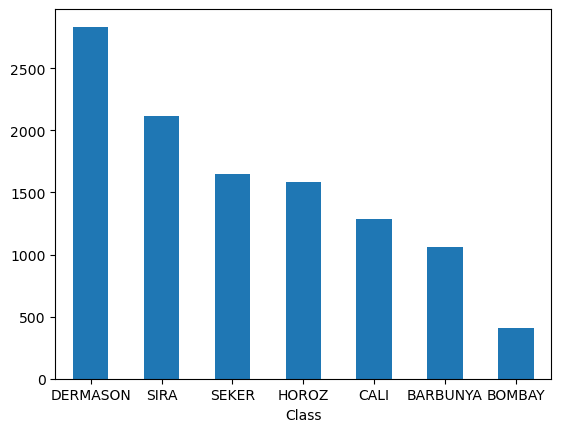

In [42]:
train_data['Class'].value_counts().plot(kind='bar', rot=0)


Let's look at the conditional distributions : 

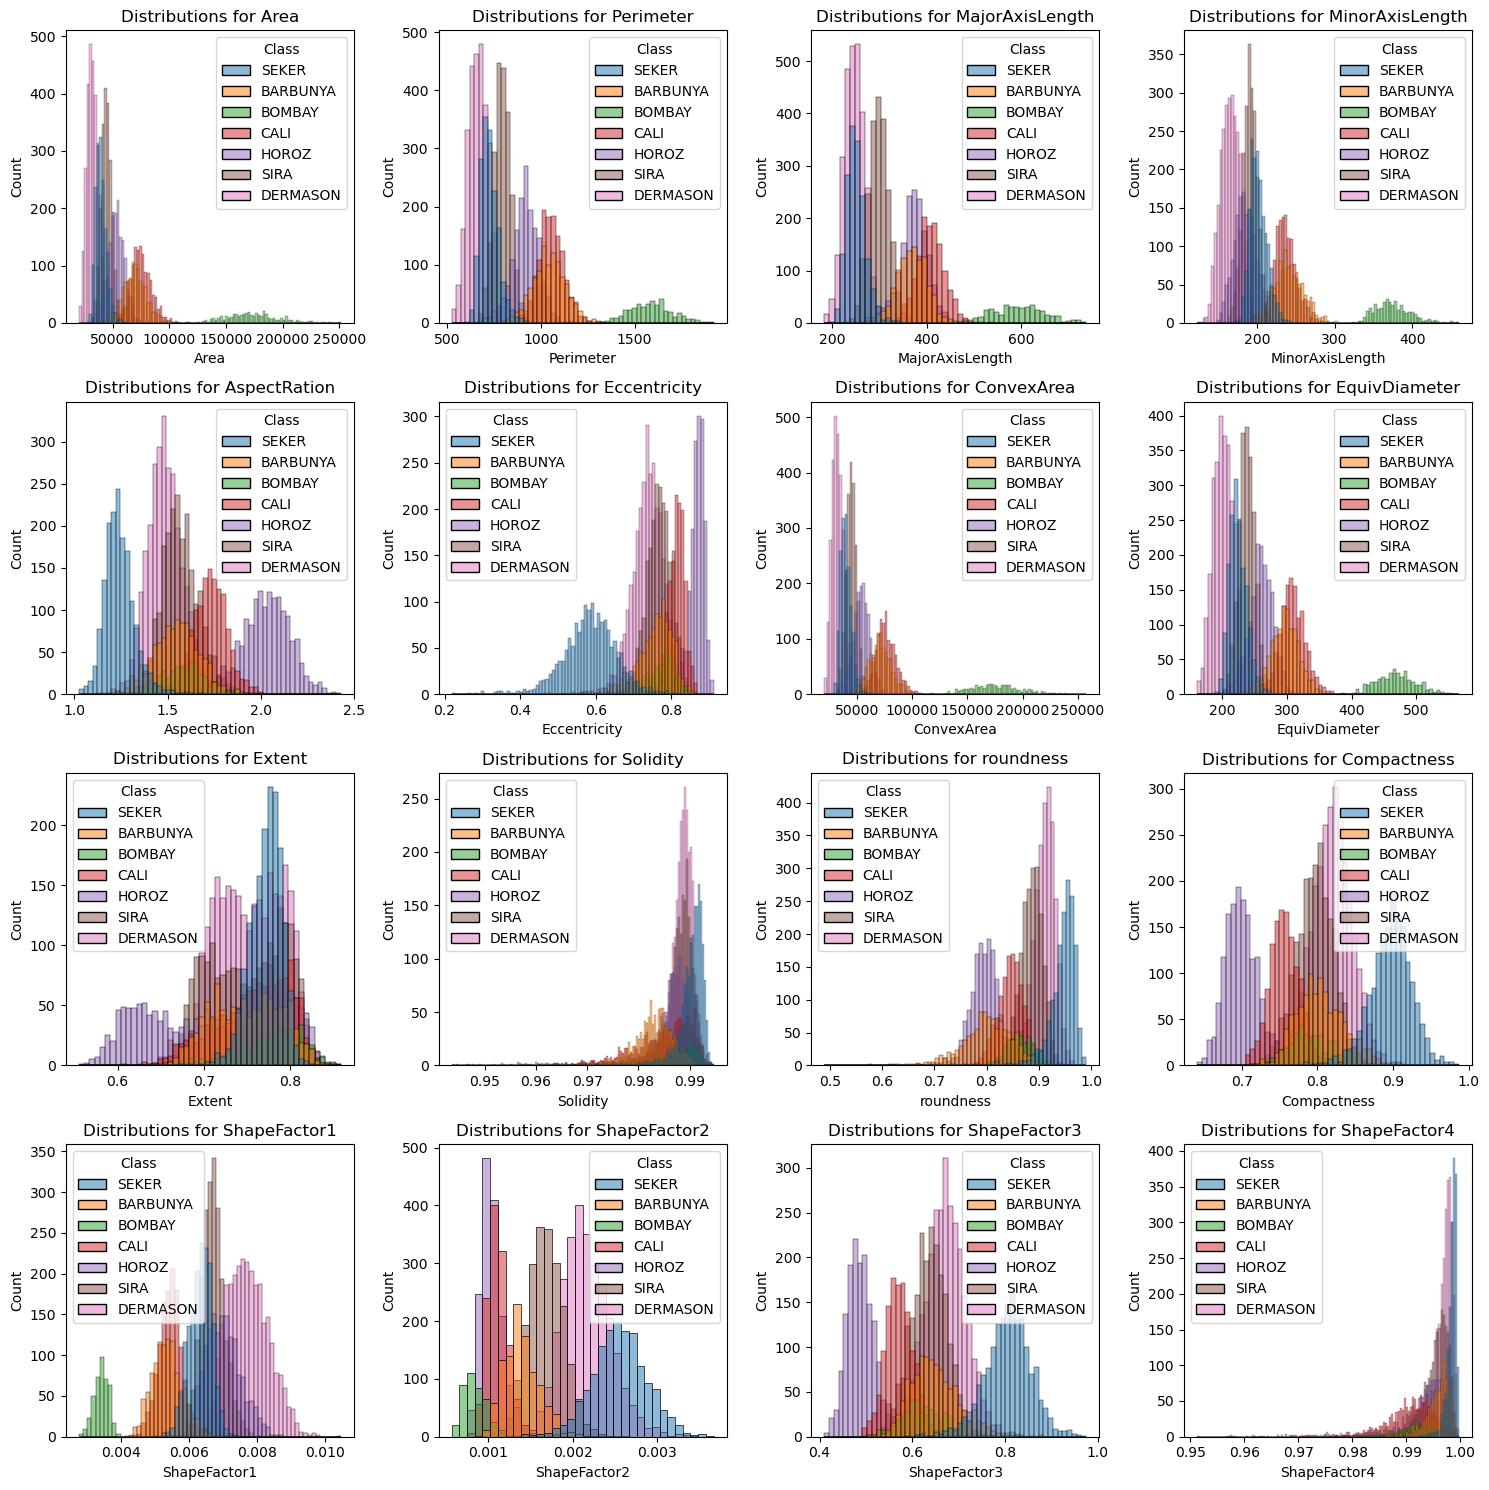

In [43]:
import seaborn as sns

import matplotlib.pyplot as plt

# Create a grid of subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

# Iterate over each feature
for i, feature in enumerate(train_data.columns[:-1]):
    # Calculate the row and column index for the subplot
    row = i // 4
    col = i % 4
    
    # Draw distribution plot for each feature conditional on target
    sns.histplot(data=train_data, x=feature, hue='Class', multiple='layer', ax=axes[row, col])
    
    # Set the title for each subplot
    axes[row, col].set_title(f'Distributions for {feature}')
    
# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

#### Correlation matrix

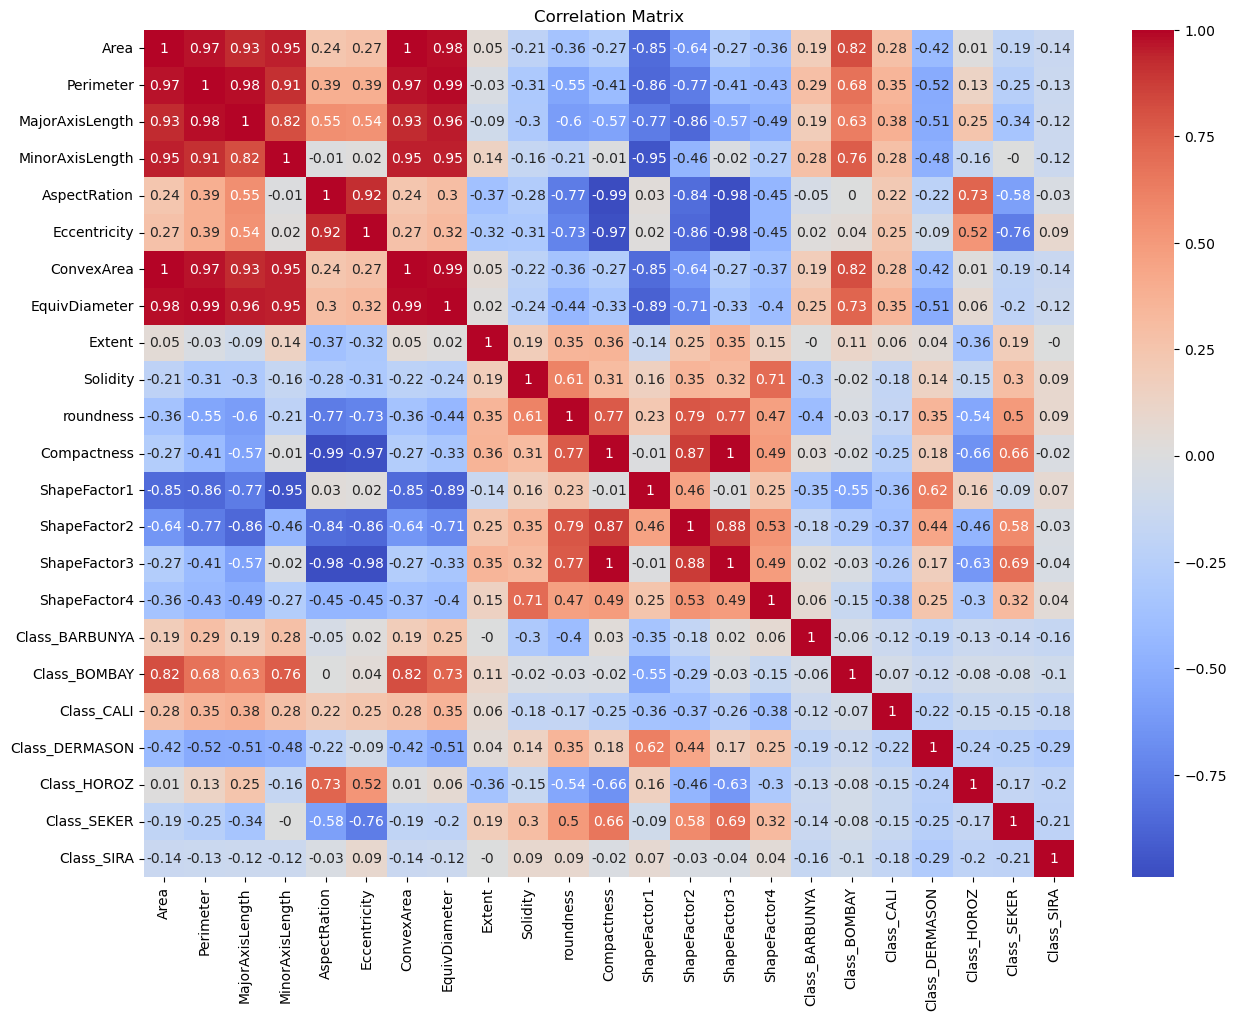

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# One-hot encode the categorical variables
data_encoded = pd.get_dummies(train_data)

# Calculate the correlation matrix
correlation_matrix = data_encoded.corr().round(2)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(15, 11))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


#### Data projection

Here are so data projection to guide you for your model.

First PCA

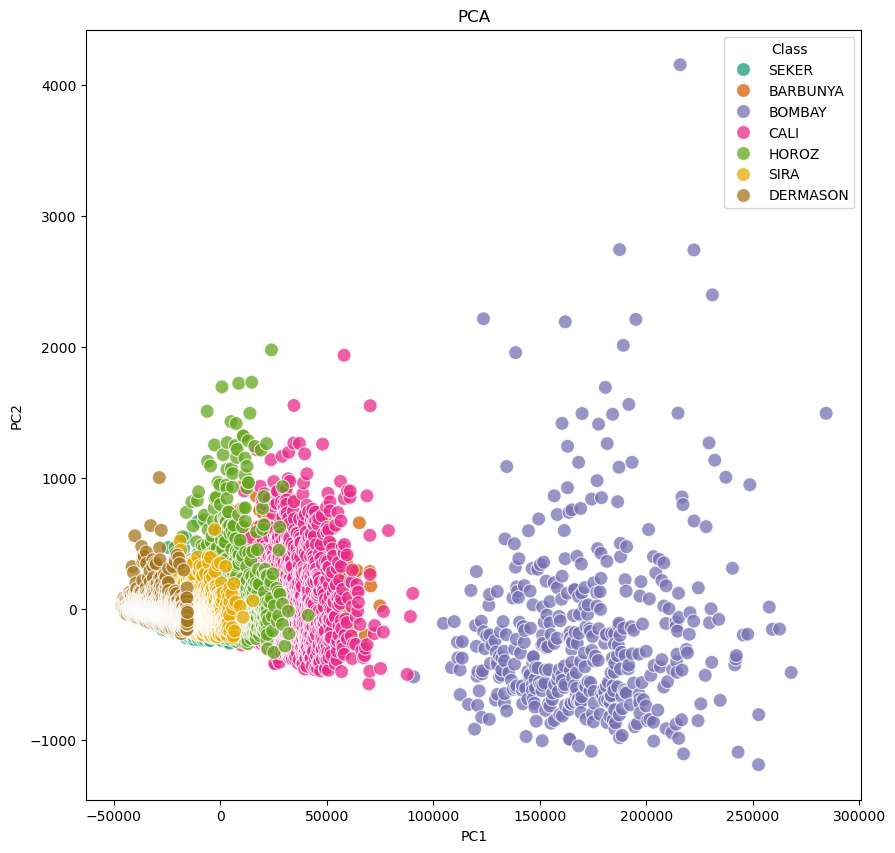

In [45]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
X_train = train_data.drop(columns=['Class'])

# One-hot encode the categorical variables

# Create the PCA instance and fit and transform the data
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train)

# Create a new dataset from principal components
pca_df = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
pca_df['Class'] = train_data['Class']

# Create a scatter plot of the two principal components
plt.figure(figsize=(10, 10))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Class', s=100, alpha=0.75, palette='Dark2')
plt.title('PCA')
plt.show()


Then UMAP

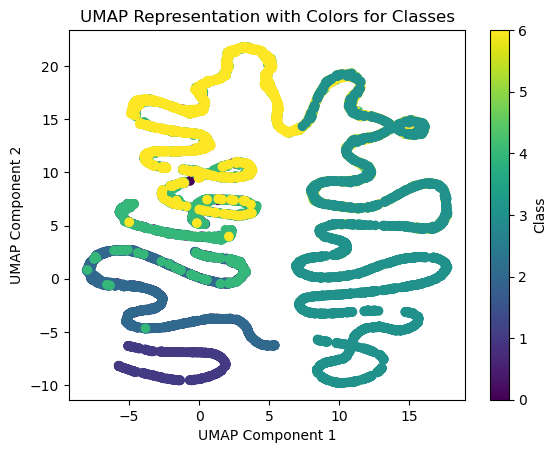

In [47]:
import umap
import matplotlib.pyplot as plt

# Create a UMAP object with 2 dimensions
umap_model = umap.UMAP(n_components=2)

# Fit the UMAP model to the data
umap_data = umap_model.fit_transform(X_train)

# Convert 'Class' column to categorical data type
train_data['Class'] = train_data['Class'].astype('category')

# Create a scatter plot of the UMAP representation with colors for the classes
plt.scatter(umap_data[:, 0], umap_data[:, 1], c=train_data['Class'].cat.codes)
plt.title('UMAP Representation with Colors for Classes')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.colorbar(label='Class')
plt.show()




And the last one TSNE : 

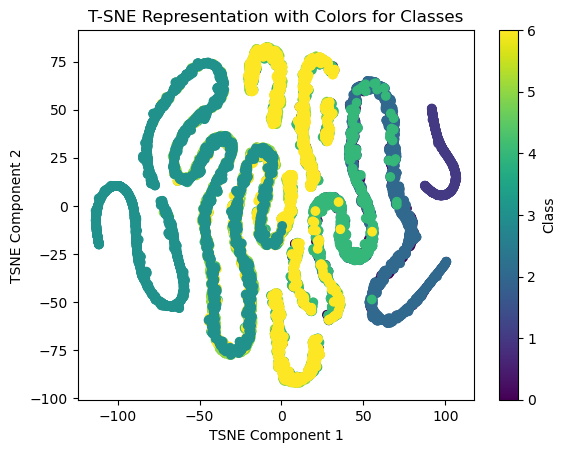

In [23]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Create a TSNE object with 2 dimensions
tsne = TSNE(n_components=2)

# Fit the TSNE model to the data
tsne_data = tsne.fit_transform(X_train)

# Create a scatter plot of the TSNE representation with colors for the classes
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=train_data['Class'].cat.codes)
plt.title('T-SNE Representation with Colors for Classes')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.colorbar(label='Class')
plt.show()


### Test set

The test set has 2667 exemples:

In [25]:
test_data = pd.read_csv("data/test.csv")
test_data.shape

(2667, 17)

In [26]:
test_data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,30917,640.765,213.560089,184.439871,1.157885,0.504102,31280,198.405511,0.770805,0.988395,0.946258,0.929038,0.006908,0.003174,0.863112,0.999384,SEKER
1,31091,638.558,210.486255,188.326848,1.117665,0.446622,31458,198.963039,0.786377,0.988334,0.958173,0.945254,0.006770,0.003334,0.893506,0.998640,SEKER
2,31272,638.666,212.450319,187.535939,1.132851,0.469883,31593,199.541342,0.770322,0.989840,0.963425,0.939238,0.006794,0.003261,0.882167,0.999364,SEKER
3,31637,656.711,229.719255,175.510446,1.308864,0.645191,32045,200.702465,0.761823,0.987268,0.921842,0.873686,0.007261,0.002610,0.763327,0.999091,SEKER
4,32038,645.085,224.482321,181.940867,1.233820,0.585751,32308,201.970415,0.770515,0.991643,0.967479,0.899716,0.007007,0.002832,0.809490,0.998765,SEKER


In [27]:
test_data.isna().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

#### Class distribution

<Axes: xlabel='Class'>

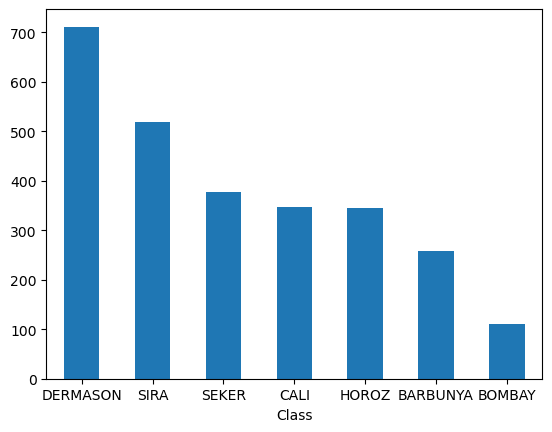

In [28]:
test_data['Class'].value_counts().plot(kind='bar', rot=0)


Let's look at the conditional distributions : 

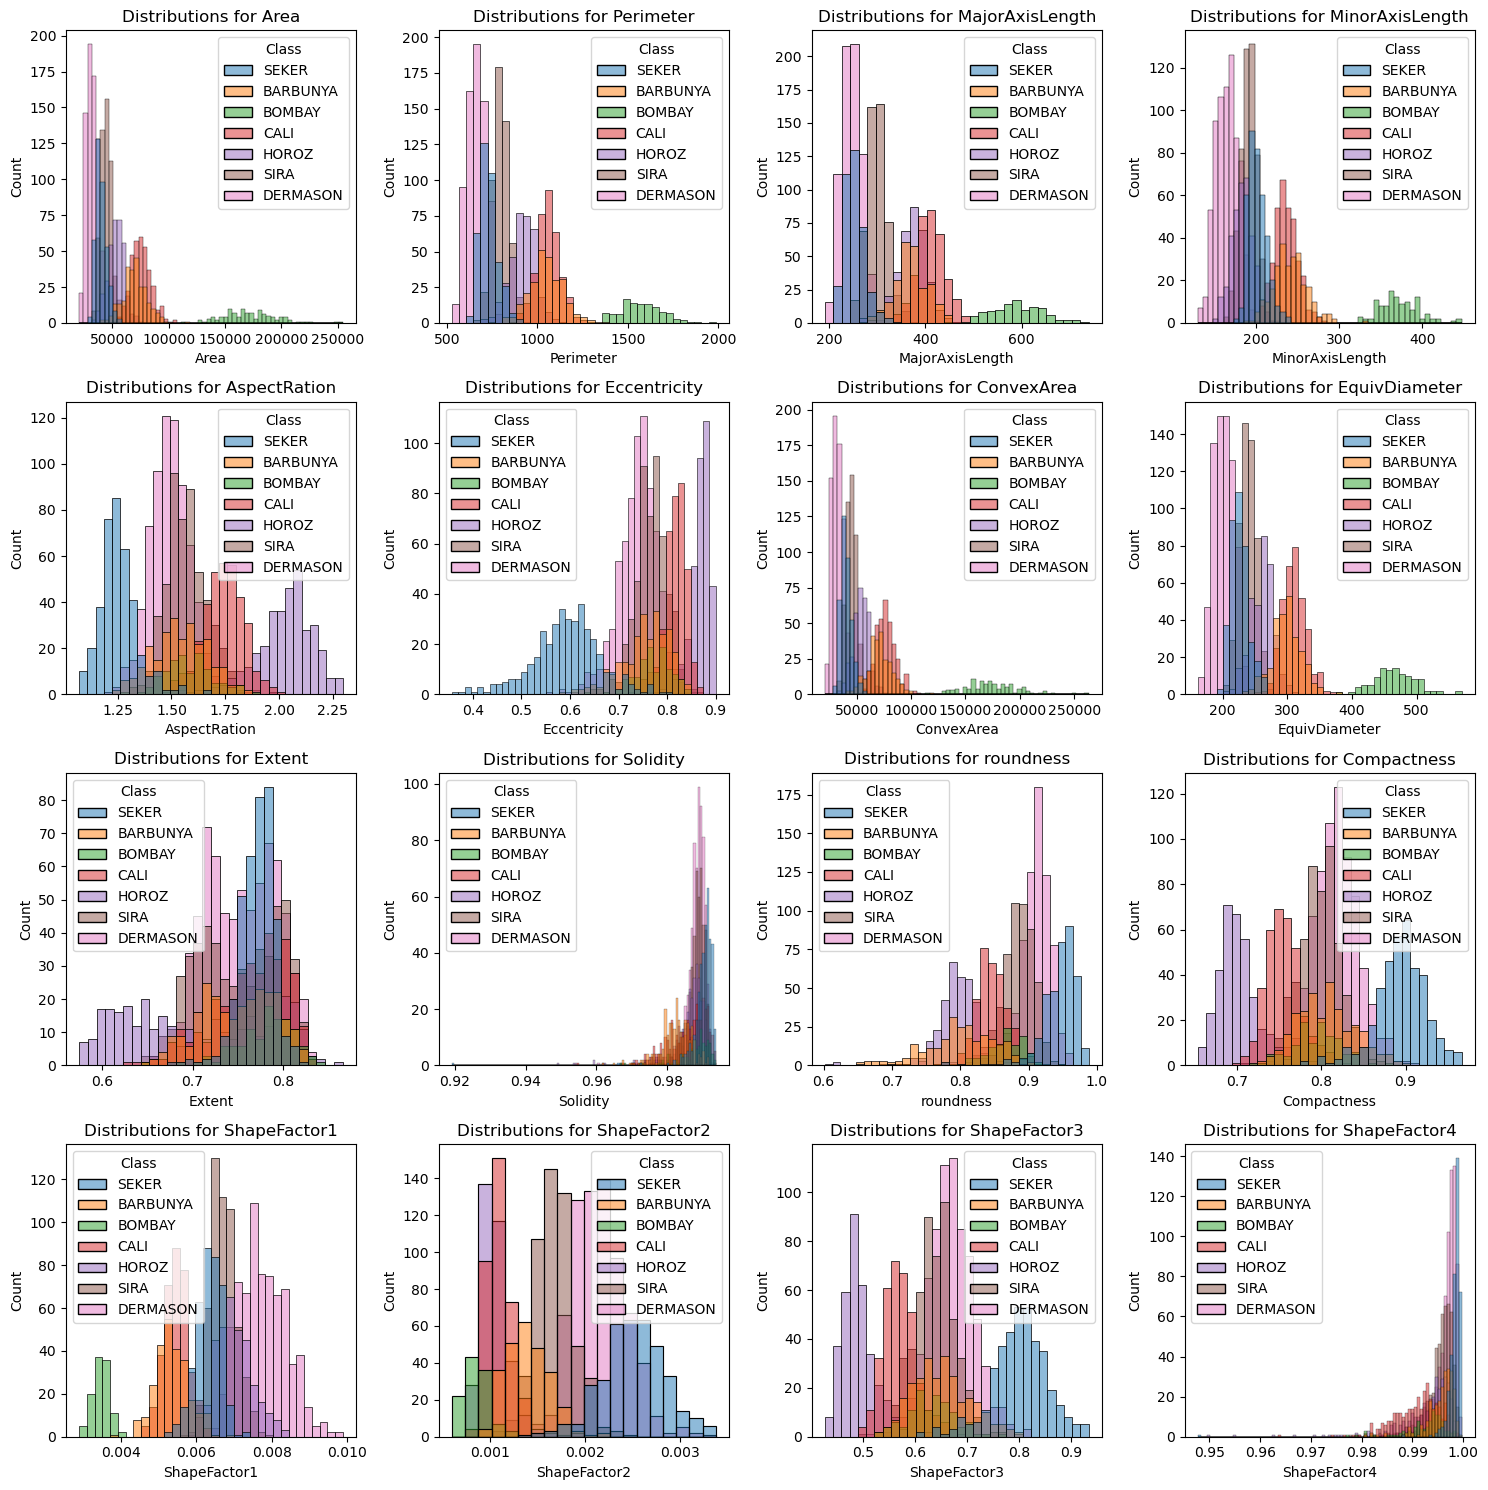

In [29]:
import seaborn as sns

import matplotlib.pyplot as plt

# Create a grid of subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

# Iterate over each feature
for i, feature in enumerate(test_data.columns[:-1]):
    # Calculate the row and column index for the subplot
    row = i // 4
    col = i % 4
    
    # Draw distribution plot for each feature conditional on target
    sns.histplot(data=test_data, x=feature, hue='Class', multiple='layer', ax=axes[row, col])
    
    # Set the title for each subplot
    axes[row, col].set_title(f'Distributions for {feature}')
    
# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

#### Correlation Matrix

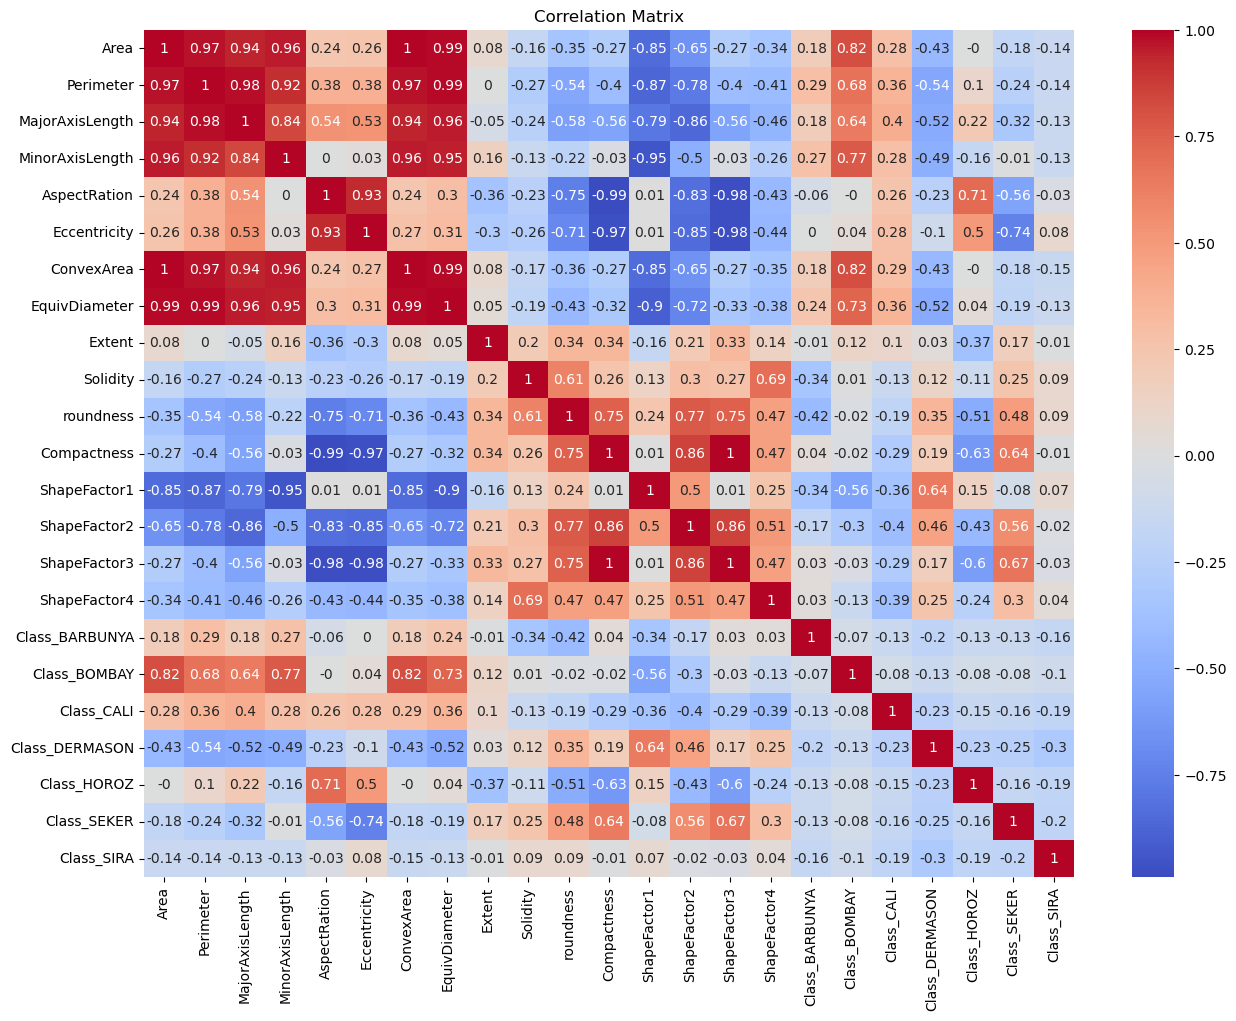

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# One-hot encode the categorical variables
data_encoded = pd.get_dummies(test_data)

# Calculate the correlation matrix
correlation_matrix = data_encoded.corr().round(2)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(15, 11))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


#### Data projection

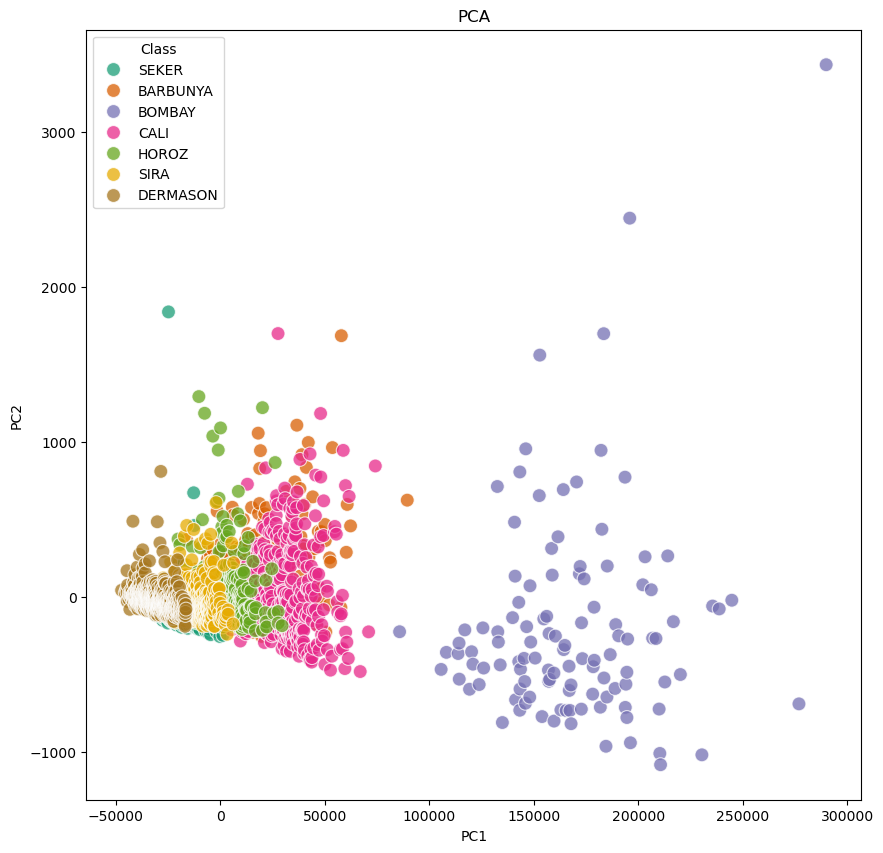

In [31]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
X_test = test_data.drop(columns=['Class'])

# One-hot encode the categorical variables

# Create the PCA instance and fit and transform the data
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_test)

# Create a new dataset from principal components
pca_df = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
pca_df['Class'] = test_data['Class']

# Create a scatter plot of the two principal components
plt.figure(figsize=(10, 10))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Class', s=100, alpha=0.75, palette='Dark2')
plt.title('PCA')
plt.show()


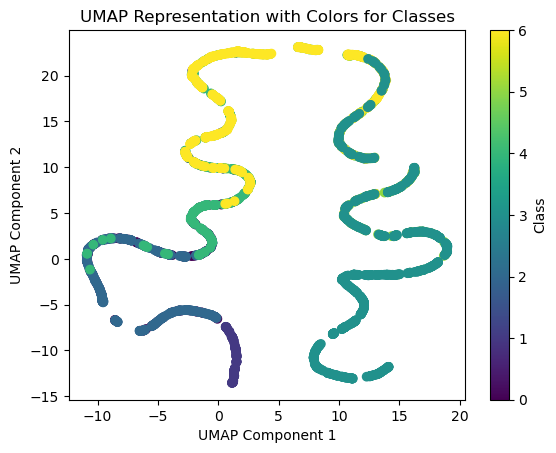

In [49]:
import umap
import matplotlib.pyplot as plt

# Convert 'Class' column to categorical data type
test_data['Class'] = test_data['Class'].astype('category')

# Create a UMAP object with 2 dimensions
umap_model = umap.UMAP(n_components=2)


# Fit the UMAP model to the data
umap_data = umap_model.fit_transform(X_test)

# Create a scatter plot of the UMAP representation with colors for the classes
plt.scatter(umap_data[:, 0], umap_data[:, 1], c=test_data['Class'].cat.codes)
plt.title('UMAP Representation with Colors for Classes')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.colorbar(label='Class')
plt.show()




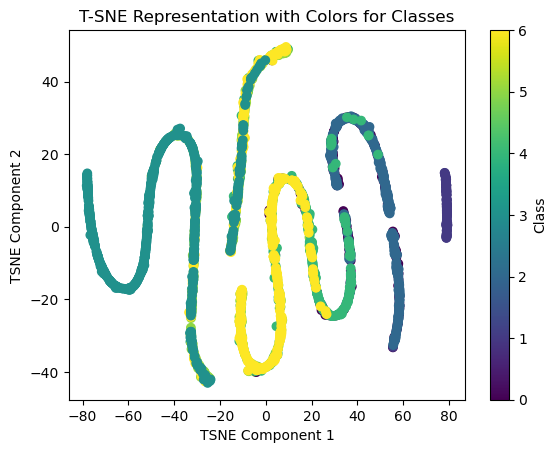

In [50]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Create a TSNE object with 2 dimensions
tsne = TSNE(n_components=2)

# Fit the TSNE model to the data
tsne_data = tsne.fit_transform(X_test)

# Create a scatter plot of the TSNE representation with colors for the classes
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=test_data['Class'].cat.codes)
plt.title('T-SNE Representation with Colors for Classes')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.colorbar(label='Class')
plt.show()


## Base model

## Submitting to the online challenge: [ramp.studio](https://ramp.studio) <a class="anchor" id="submitting"></a>

Once you found a good model, you can submit them to [ramp.studio](https://www.ramp.studio) to enter the online challenge. First, if it is your first time using the RAMP platform, [sign up](https://www.ramp.studio/sign_up), otherwise [log in](https://www.ramp.studio/login). Then sign up to the event [hotjupiter](http://www.ramp.studio/events/hotjupiter_datacamp2023). Both signups are controled by RAMP administrators, so there **can be a delay between asking for signup and being able to submit**.

Once your signup request is accepted, you can go to your [sandbox](https://www.ramp.studio/events/hotjupiter_datacamp2023/sandbox) and write the code for your classifier directly on the browser. You can also create a new folder `my_submission` in the `submissions` folder containing `classifier.py` and upload this file directly. You can check the starting-kit ([`classifier.py`](/edit/submissions/starting_kit/classifier.py)) for an example. The submission is trained and tested on our backend in the similar way as `ramp-test` does it locally. While your submission is waiting in the queue and being trained, you can find it in the "New submissions (pending training)" table in [my submissions](https://www.ramp.studio/events/hotjupiter_datacamp2023/my_submissions). Once it is trained, your submission shows up on the [public leaderboard](https://www.ramp.studio/events/hotjupiter_datacamp2023/leaderboard). 
If there is an error (despite having tested your submission locally with `ramp-test`), it will show up in the "Failed submissions" table in [my submissions](https://www.ramp.studio/events/hotjupiter_datacamp2023/my_submissions). You can click on the error to see part of the trace.

The data set we use at the backend is usually different from what you find in the starting kit, so the score may be different.

The usual way to work with RAMP is to explore solutions, add feature transformations, select models, etc., _locally_, and checking them with `ramp-test`. The script prints mean cross-validation scores.

The official score in this RAMP (the first score column on the [leaderboard](http://www.ramp.studio/events/hotjupiter_datacamp2023/leaderboard)) is the balenced accuracy score (`bal_acc`). When the score is good enough, you can submit it at the RAMP.

Here is the script proposed as the starting_kit:

In [54]:
from sklearn.base import BaseEstimator
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

class Classifier(BaseEstimator):
    def __init__(self):
        self.transformer = Pipeline(
            steps=[
                ("imputer", SimpleImputer(strategy="median")),
                ("scaler", StandardScaler()),
            ]
        )
        self.model = LinearSVC(max_iter=50, C=0.01)
        self.pipe = make_pipeline(self.transformer, self.model)

    def fit(self, X, y):
        self.pipe.fit(X, y)

    def predict(self, X):
        return self.pipe.predict(X)

    def predict_proba(self, X):
        return self.pipe.predict_proba(X)


You can test your solution locally by running the ramp-test command followed by --submission <my_submission folder>.
Here is an example with the starting_kit submission:

In [55]:
!ramp-test --submission starting_kit

Testing Hot Jupiter atmospheric pattern classification
Reading train and test files from ./data/ ...
Reading cv ...
Training submissions/starting_kit ...
CV fold 0
	score  bal_acc    acc      time
	train    0.214  0.209  0.007614
	valid    0.257  0.251  0.000699
	test     0.221  0.221  0.000097
CV fold 1
	score  bal_acc    acc      time
	train    0.213  0.176  0.006831
	valid    0.211  0.182  0.000787
	test     0.215  0.206  0.000118
CV fold 2
	score  bal_acc    acc      time
	train    0.206  0.213  0.006035
	valid    0.194  0.217  0.000530
	test     0.212  0.162  0.000059
----------------------------
Mean CV scores
----------------------------
	score         bal_acc             acc       time
	train  0.211 ± 0.0034  0.199 ± 0.0167  0.0 ± 0.0
	valid   0.22 ± 0.0265  0.217 ± 0.0283  0.0 ± 0.0
	test   0.216 ± 0.0036   0.196 ± 0.025  0.0 ± 0.0
----------------------------
Bagged scores
----------------------------
	score  bal_acc    acc
	valid    0.213  0.218
	test     0.179  0.147


## More information

See the [online documentation](https://paris-saclay-cds.github.io/ramp-docs/ramp-workflow/stable/using_kits.html) for more details.

## Questions

Questions related to the starting kit should be asked on the [issue tracker](https://github.com/ramp-kits/tephra/issues).